In [2]:
import pandas as pd

# Load the datasets
vaccinations_path = "/content/vaccinations.csv"
lookup_table_path = "/content/UID_ISO_FIPS_LookUp_Table.csv"

# Read the CSV files into Pandas
vaccination_df = pd.read_csv(vaccinations_path)
lookup_df = pd.read_csv(lookup_table_path)

# Simulate or load cases dataset
# Replace this with your actual cases data loading logic
cases_data = {
    "Country": ["Argentina", "Argentina", "Argentina", "Brazil", "Brazil"],
    "Date": ["2020-12-29", "2020-12-30", "2020-12-31", "2020-12-29", "2020-12-30"],
    "Confirmed": [100, 150, 200, 300, 400],
    "Deaths": [1, 2, 3, 5, 6],
}
cases_df = pd.DataFrame(cases_data)

# Convert date columns to datetime for proper merging and operations
vaccination_df['date'] = pd.to_datetime(vaccination_df['date'])
cases_df['Date'] = pd.to_datetime(cases_df['Date'])

# Aggregate cases by country and date
daily_cases = cases_df.groupby(["Country", "Date"]).agg(
    TotalConfirmed=("Confirmed", "sum"),
    TotalDeaths=("Deaths", "sum")
).reset_index()

# Join vaccination data with cases data
# Rename columns for consistency
vaccination_df = vaccination_df.rename(columns={"location": "Country", "date": "Date"})
combined_df = pd.merge(daily_cases, vaccination_df, on=["Country", "Date"], how="left")

# Calculate daily new cases using shift
combined_df.sort_values(by=["Country", "Date"], inplace=True)
combined_df['NewCases'] = combined_df.groupby("Country")['TotalConfirmed'].diff()

# Fill NaN values in 'NewCases' with 0 (if necessary)
combined_df['NewCases'] = combined_df['NewCases'].fillna(0)

# Display the final result
print(combined_df)


     Country       Date  TotalConfirmed  TotalDeaths iso_code  \
0  Argentina 2020-12-29             100            1      ARG   
1  Argentina 2020-12-30             150            2      ARG   
2  Argentina 2020-12-31             200            3      ARG   
3     Brazil 2020-12-29             300            5      NaN   
4     Brazil 2020-12-30             400            6      NaN   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0               700.0                NaN                      NaN   
1                 NaN                NaN                      NaN   
2             32013.0                NaN                      NaN   
3                 NaN                NaN                      NaN   
4                 NaN                NaN                      NaN   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                 NaN                            0.00   
1                     NaN       

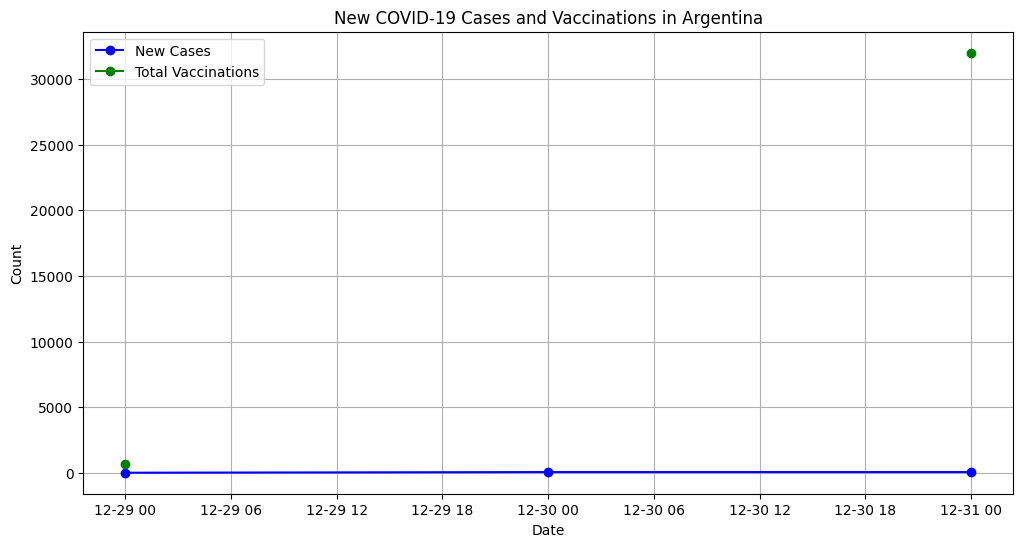

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
vaccinations_path = "/content/vaccinations.csv"
lookup_table_path = "/content/UID_ISO_FIPS_LookUp_Table.csv"

# Read the CSV files into Pandas
vaccination_df = pd.read_csv(vaccinations_path)
lookup_df = pd.read_csv(lookup_table_path)

# Simulate or load cases dataset
# Replace this with your actual cases data loading logic
cases_data = {
    "Country": ["Argentina", "Argentina", "Argentina", "Brazil", "Brazil"],
    "Date": ["2020-12-29", "2020-12-30", "2020-12-31", "2020-12-29", "2020-12-30"],
    "Confirmed": [100, 150, 200, 300, 400],
    "Deaths": [1, 2, 3, 5, 6],
}
cases_df = pd.DataFrame(cases_data)

# Convert date columns to datetime for proper merging and operations
vaccination_df['date'] = pd.to_datetime(vaccination_df['date'])
cases_df['Date'] = pd.to_datetime(cases_df['Date'])

# Aggregate cases by country and date
daily_cases = cases_df.groupby(["Country", "Date"]).agg(
    TotalConfirmed=("Confirmed", "sum"),
    TotalDeaths=("Deaths", "sum")
).reset_index()

# Join vaccination data with cases data
# Rename columns for consistency
vaccination_df = vaccination_df.rename(columns={"location": "Country", "date": "Date"})
combined_df = pd.merge(daily_cases, vaccination_df, on=["Country", "Date"], how="left")

# Calculate daily new cases using shift
combined_df.sort_values(by=["Country", "Date"], inplace=True)
combined_df['NewCases'] = combined_df.groupby("Country")['TotalConfirmed'].diff()

# Fill NaN values in 'NewCases' with 0 (if necessary)
combined_df['NewCases'] = combined_df['NewCases'].fillna(0)

# Visualization: Plotting New Cases and Vaccinations
plt.figure(figsize=(12, 6))

# Filter for a specific country (e.g., Argentina)
country_data = combined_df[combined_df['Country'] == 'Argentina']

# Plot New Cases
plt.plot(country_data['Date'], country_data['NewCases'], label='New Cases', marker='o', color='blue')

# Plot Total Vaccinations
if 'total_vaccinations' in country_data.columns:
    plt.plot(country_data['Date'], country_data['total_vaccinations'], label='Total Vaccinations', marker='o', color='green')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('New COVID-19 Cases and Vaccinations in Argentina')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
